In [1]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [4]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.035448756 0.30128643


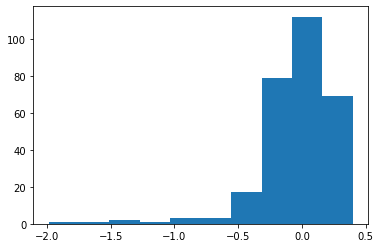

In [6]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.show()

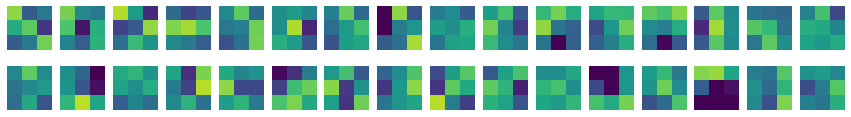

In [8]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [10]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [11]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights[0].mean(),no_training_weights[1].std())

0.009332954 0.088061735


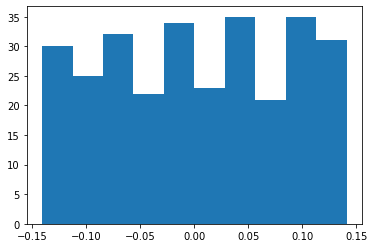

In [14]:
plt.hist(no_training_weights.reshape(-1,1))
plt.show()

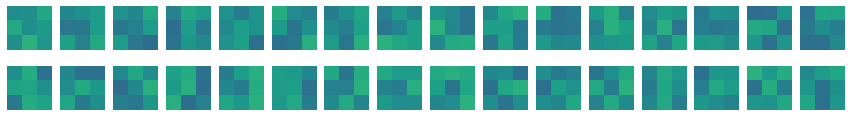

In [16]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [17]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [18]:
conv_acti = keras.Model(model.input,model.layers[0].output)

In [20]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

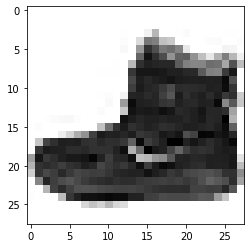

In [21]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [22]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)

In [23]:
print(feature_maps.shape)

(1, 28, 28, 32)


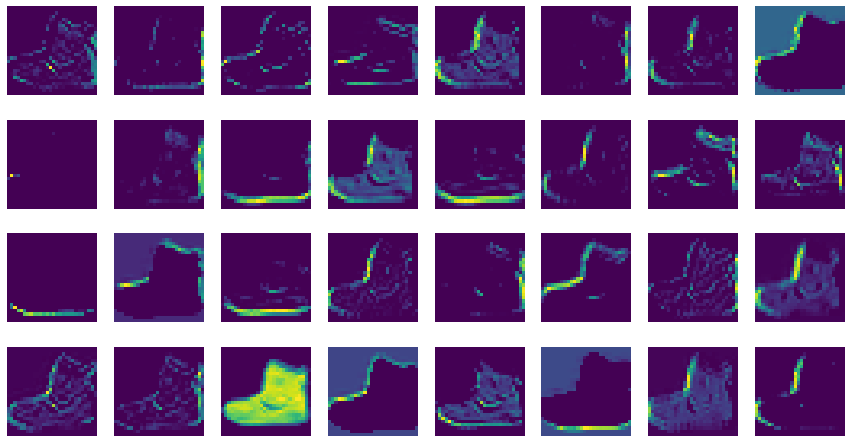

In [25]:
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [26]:
conv2_acti=keras.Model(model.input,model.layers[2].output)


In [27]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

In [28]:
feature_maps.shape

(1, 14, 14, 64)

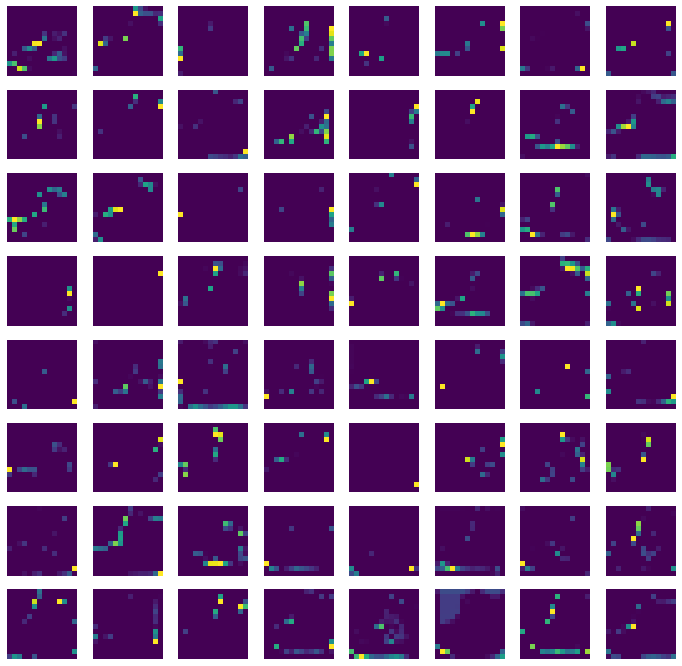

In [29]:
fig,axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()